# 2. Probability Distributions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from prml.random import (
    Bernoulli,
    Beta,
    Categorical,
    Dirichlet,
    Gamma,
    Gaussian,
    GaussianMixture,
    StudentsT,
    Uniform
)

## 2.1 Binary Variables

In [2]:
model = Bernoulli()
model.ml(np.array([0., 1., 1., 1.])[:, None])
print(model)

Bernoulli(prob=[ 0.75])


### 2.1.1 The beta distributions

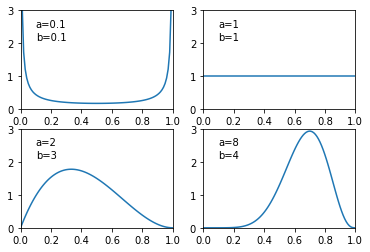

In [3]:
x = np.linspace(0, 1, 100)[:, None]
for i, [a, b] in enumerate([[0.1, 0.1], [1, 1], [2, 3], [8, 4]]):
    plt.subplot(2, 2, i + 1)
    beta = Beta(np.array([a]), np.array([b]))
    plt.xlim(0, 1)
    plt.ylim(0, 3)
    plt.plot(x, beta(x))
    plt.annotate("a={}".format(a), (0.1, 2.5))
    plt.annotate("b={}".format(b), (0.1, 2.1))
plt.show()

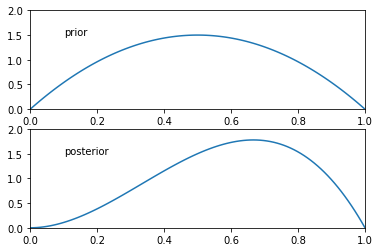

In [4]:
beta = Beta(np.array([2.]), np.array([2.]))
plt.subplot(2, 1, 1)
plt.xlim(0, 1)
plt.ylim(0, 2)
plt.plot(x, beta(x))
plt.annotate("prior", (0.1, 1.5))

model = Bernoulli(prob=beta)
model.bayes(np.array([[1.]]))
plt.subplot(2, 1, 2)
plt.xlim(0, 1)
plt.ylim(0, 2)
plt.plot(x, model.prob(x))
plt.annotate("posterior", (0.1, 1.5))

plt.show()

In [5]:
print("prediction with the ML model")
model = Bernoulli()
model.ml(np.ones((1, 1)))
print("{} out of 10000 is 1".format(model.draw(10000).sum()))

print("prediction with the Bayesian model")
model = Bernoulli(prob=Beta(np.ones(1), np.ones(1)))
model.bayes(np.ones((1, 1)))
print("{} out of 10000 is 1".format(model.draw(10000).sum()))

prediction with the ML model
10000 out of 10000 is 1
prediction with the Bayesian model
6617 out of 10000 is 1


## 2.2 Multinomial Variables

In [6]:
model = Categorical()
model.ml(np.array([[0, 1, 0], [1, 0, 0], [1, 0, 0], [0, 0, 1]]))
print(model)

Categorical(prob=[ 0.5   0.25  0.25])


### 2.2.1 The Dirichlet distribution

In [7]:
mu = Dirichlet(concentration=np.ones(3))
model = Categorical(prob=mu)
print(model)

model.bayes(np.array([[1., 0., 0.], [1., 0., 0.], [0., 1., 0.]]))
print(model)

Categorical(prob=Dirichlet(concentration=[ 1.  1.  1.]))
Categorical(prob=Dirichlet(concentration=[ 3.  2.  1.]))


## 2.3 The Gaussian Distribution

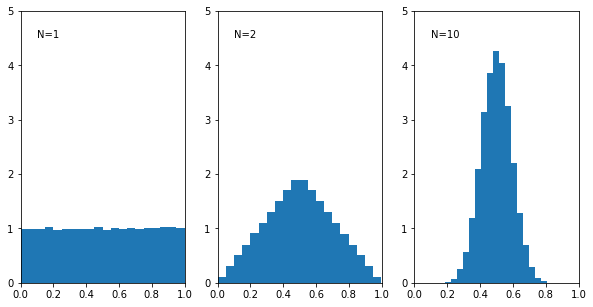

In [8]:
uniform = Uniform(low=np.zeros(1), high=np.ones(1))
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.xlim(0, 1)
plt.ylim(0, 5)
plt.annotate("N=1", (0.1, 4.5))
plt.hist(uniform.draw(100000), bins=20, normed=True)

plt.subplot(1, 3, 2)
plt.xlim(0, 1)
plt.ylim(0, 5)
plt.annotate("N=2", (0.1, 4.5))
plt.hist(0.5 * (uniform.draw(100000) + uniform.draw(100000)), bins=20, normed=True)

plt.subplot(1, 3, 3)
plt.xlim(0, 1)
plt.ylim(0, 5)
sample = 0
for _ in range(10):
    sample = sample + uniform.draw(100000)
plt.annotate("N=10", (0.1, 4.5))
plt.hist(sample * 0.1, bins=20, normed=True)

plt.show()

### 2.3.4 Maximum Likelihood for the Gaussian

Gaussian(
mean=[ 0.87879672  1.25631245],
var=
[[  4.27453914e+00  -1.96306708e-03]
 [ -1.96306708e-03   3.75702086e+00]]
)


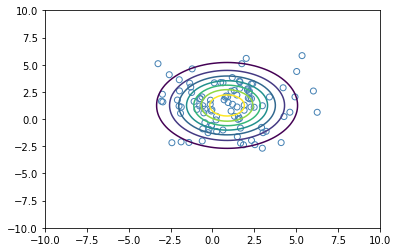

In [9]:
X = np.random.normal(loc=1., scale=2., size=(100, 2))
gaussian = Gaussian()
gaussian.ml(X)
print(gaussian)

x, y = np.meshgrid(
    np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
p = gaussian(
    np.array([x, y]).reshape(2, -1).T).reshape(100, 100)
plt.scatter(X[:, 0], X[:, 1], facecolor="none", edgecolor="steelblue")
plt.contour(x, y, p)
plt.show()

### 2.3.6 Bayesian inference for the Gaussian

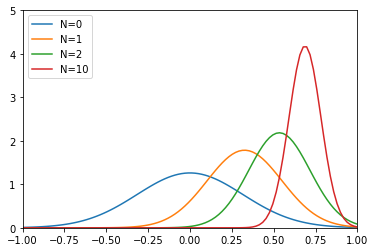

In [10]:
mu = Gaussian(np.zeros(1), np.eye(1) * 0.1)
model = Gaussian(mu, np.eye(1) * 0.1)

x = np.linspace(-1, 1, 100)[:, None]
plt.plot(x, model.mean(x), label="N=0")

model.bayes(np.random.normal(loc=0.8, scale=0.1, size=(1, 1)))
plt.plot(x, model.mean(x), label="N=1")

model.bayes(np.random.normal(loc=0.8, scale=0.1, size=(1, 1)))
plt.plot(x, model.mean(x), label="N=2")

model.bayes(np.random.normal(loc=0.8, scale=0.1, size=(8, 1)))
plt.plot(x, model.mean(x), label="N=10")

plt.xlim(-1, 1)
plt.ylim(0, 5)
plt.legend()
plt.show()

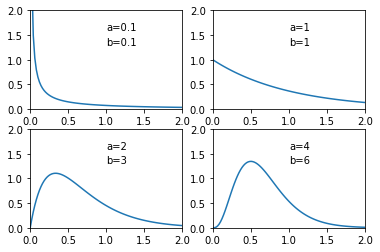

In [11]:
x = np.linspace(0, 2, 100)[:, None]
for i, [a, b] in enumerate([[0.1, 0.1], [1, 1], [2, 3], [4, 6]]):
    plt.subplot(2, 2, i + 1)
    gamma = Gamma(a, b)
    plt.xlim(0, 2)
    plt.ylim(0, 2)
    plt.plot(x, gamma(x))
    plt.annotate("a={}".format(a), (1, 1.6))
    plt.annotate("b={}".format(b), (1, 1.3))
plt.show()

In [12]:
lambda_ = Gamma(shape=1, rate=1)
model = Gaussian(mean=np.zeros(1), precision=lambda_)
print(model)

model.bayes(np.random.normal(scale=1.414, size=(100, 1)))
print(model)

Gaussian(
mean=[ 0.],
precision=
Gamma(shape=1, rate=1)
)
Gaussian(
mean=[ 0.],
precision=
Gamma(shape=51.0, rate=73.21637543678449)
)


### 2.3.7 Student's t-distribution

Gaussian(
mean=[ 2.26819644],
var=
[[ 46.44545236]]
)
Student's T(
mu=[-0.39323384],
precision=
[[ 5.59638659]],
dof=0.7268729329407823
)


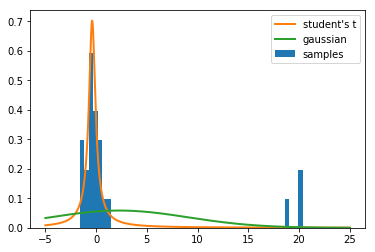

In [13]:
X = np.random.normal(size=(20, 1))
X = np.concatenate([X, np.random.normal(loc=20., size=(3, 1))])
plt.hist(X.ravel(), bins=50, normed=1., label="samples")

students_t = StudentsT()
gaussian = Gaussian()

gaussian.ml(X)
students_t.ml(X)

print(gaussian)
print(students_t)

x = np.linspace(-5, 25, 1000)[:, None]
plt.plot(x, students_t(x), label="student's t", linewidth=2)
plt.plot(x, gaussian(x), label="gaussian", linewidth=2)
plt.legend()
plt.show()

### 2.3.9 Mixture of Gaussians

GaussianMixture(
means=
[[-5.08771806 -5.08335316]
 [-0.07516277  4.91222489]
 [ 5.17065364 -5.00275002]],
variances=
[[[ 1.14687285  0.23576801]
  [ 0.23576801  0.9952285 ]]

 [[ 0.99722694  0.00145628]
  [ 0.00145628  0.82991752]]

 [[ 0.90608054 -0.01199288]
  [-0.01199288  0.90050261]]],
coefs=[ 0.33333333  0.33333333  0.33333333]
)


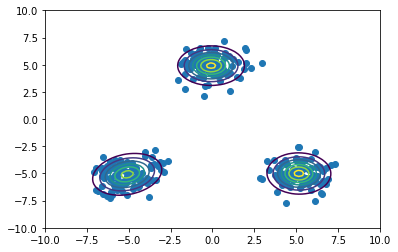

In [14]:
x1 = np.random.normal(size=(100, 2))
x1 += np.array([-5, -5])
x2 = np.random.normal(size=(100, 2))
x2 += np.array([5, -5])
x3 = np.random.normal(size=(100, 2))
x3 += np.array([0, 5])
X = np.vstack((x1, x2, x3))

model = GaussianMixture(n_components=3)
model.ml(X)
print(model)

x_test, y_test = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
X_test = np.array([x_test, y_test]).reshape(2, -1).transpose()
probs = model(X_test)
Probs = probs.reshape(100, 100)
plt.scatter(X[:, 0], X[:, 1])
plt.contour(x_test, y_test, Probs)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()